In This Note Book We will Explore IPL Dataset and Apply Machine Learning Techniques For Predictive Analysis


In [191]:
# libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [192]:
# loading the dataset
deliveries = pd.read_csv('deliveries.csv')

# checking the first 5 rows of the dataset
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [193]:
# getting info  about the deliveries dataset
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [194]:
# number of rows and columns in the deliveries dataset
deliveries.shape

(260920, 17)

In [195]:
# display the values in simple notations'
pd.options.display.float_format = '{:,.2f}'.format

# check for summary statistics of the deliveries dataset
deliveries[['over', 'ball', 'batsman_runs', 'extra_runs', 'total_runs', 'is_wicket']].describe()

,over,ball,batsman_runs,extra_runs,total_runs,is_wicket
count,"260,920.00","260,920.00","260,920.00","260,920.00","260,920.00","260,920.00"
mean,9.20,3.62,1.27,0.07,1.33,0.05
std,5.68,1.81,1.64,0.34,1.63,0.22
min,0.00,1.00,0.00,0.00,0.00,0.00
25%,4.00,2.00,0.00,0.00,0.00,0.00
50%,9.00,4.00,1.00,0.00,1.00,0.00
75%,14.00,5.00,1.00,0.00,1.00,0.00
max,19.00,11.00,6.00,7.00,7.00,1.00


On an average, 9.2 overs a team played in an IPL match in which 7 maximum runs were scored in an over and maximum 1 wicket was taken in an over

In [196]:
# check for missing values in the deliveries dataset
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64

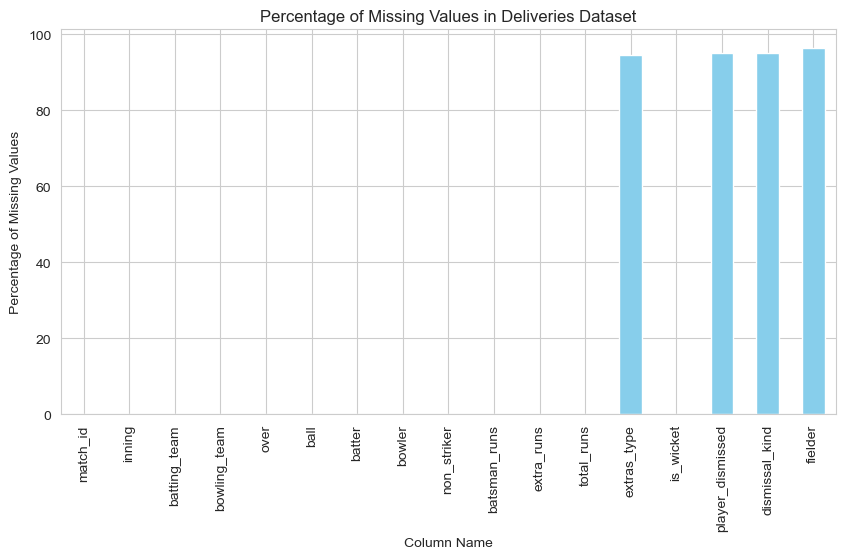

In [197]:
# checking the percentage of missing values in the deliveries dataset
missing_percentage = (deliveries.isnull().sum() / len(deliveries)) * 100
missing_percentage.plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title('Percentage of Missing Values in Deliveries Dataset')
plt.xlabel('Column Name')
plt.ylabel('Percentage of Missing Values')
plt.show()

In [198]:
# which player scored the most runs in all the seasons?
top_scorer = deliveries.groupby('batter')['batsman_runs'].sum().reset_index()
top_scorer.sort_values(by='batsman_runs', ascending=False).head(10)

,batter,batsman_runs
631,V Kohli,8014
512,S Dhawan,6769
477,RG Sharma,6630
147,DA Warner,6567
546,SK Raina,5536
374,MS Dhoni,5243
30,AB de Villiers,5181
124,CH Gayle,4997
501,RV Uthappa,4954
282,KD Karthik,4843


In [199]:
# which player threw the most overs in all the seasons?
top_bowler = deliveries.groupby('bowler')['over'].count().reset_index()
top_bowler.sort_values(by='over', ascending=False).head(10)

,bowler,over
355,R Ashwin,4679
446,SP Narine,4146
71,B Kumar,4060
348,PP Chawla,3895
373,RA Jadeja,3895
524,YS Chahal,3628
163,Harbhajan Singh,3496
8,A Mishra,3444
119,DJ Bravo,3296
494,UT Yadav,3190


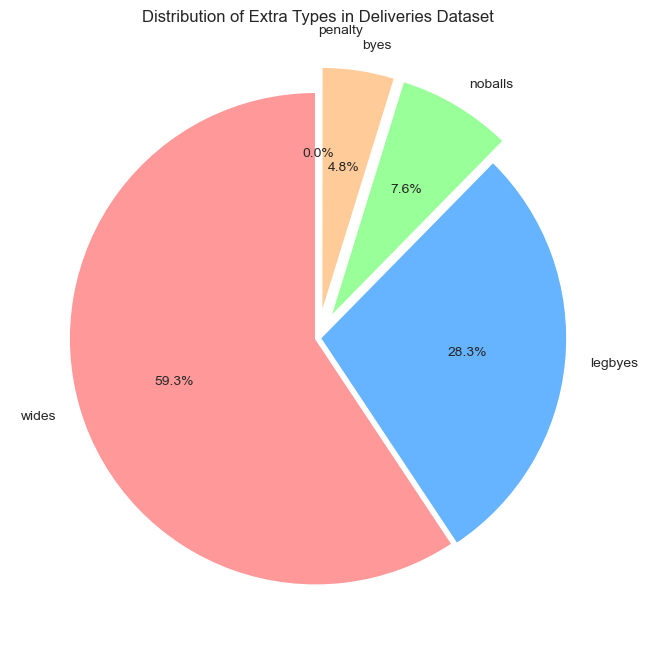

In [200]:
# most of the extra types in the deliveries dataset
extra_types = deliveries['extras_type'].value_counts().reset_index()
extra_types.columns = ['extras_type', 'count']
explode = (0.01, 0.01, 0.1, 0.1, 0.15)  # explode only the first slice

extra_types.set_index('extras_type')['count'].plot(
	kind='pie',
	autopct='%1.1f%%',
	figsize=(8, 8),
	startangle=90,
	explode=explode,
	colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']
)
plt.title('Distribution of Extra Types in Deliveries Dataset')
plt.ylabel('')
plt.show()

Most of the extra types in the deliveries dataset were wides with percentage of 59.3%
Second most common extra type was legbyes with percentage of 28.3%

In [201]:
# top 5 bowlers who dismissed the most batsmen
top_bowler_wickets = deliveries[deliveries['is_wicket'] == 1].groupby('bowler')['is_wicket'].count().reset_index()
top_bowler_wickets.sort_values(by='is_wicket', ascending=False).head(5)

,bowler,is_wicket
449,YS Chahal,213
104,DJ Bravo,207
301,PP Chawla,201
383,SP Narine,200
308,R Ashwin,198


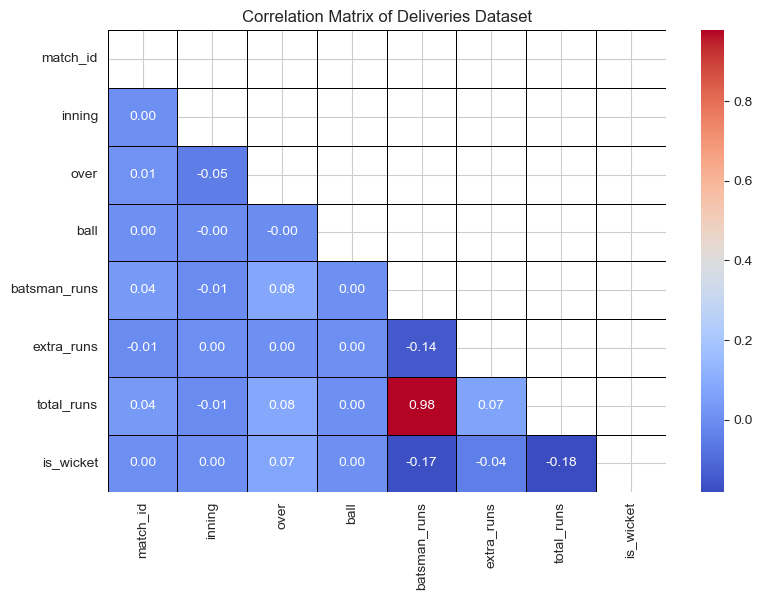

In [202]:
# Calculate correlation matrix (numeric columns only)
corr = deliveries.corr(numeric_only=True)

# Generate mask for upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot with mask
plt.figure(figsize=(9, 6))
sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    linewidths=0.5,
    linecolor='black'
)
plt.title('Correlation Matrix of Deliveries Dataset')
plt.show()

total runs and batsman runs have a strong positive correlation of 0.98 which means batesman runs are directly proportional to total runs.

At zero total runs are extras  as we can see from the scatter plot of batsman runs and total runs with increasing batsman runs, total runs are also increasing.

In [203]:
# check unique values in dismissal_kind column
dismissal_kinds = deliveries['dismissal_kind'].value_counts()
unique_kinds = deliveries['dismissal_kind'].dropna().unique()
print("Unique values in 'dismissal_kind' column:")
for kind, count in dismissal_kinds.items():
    print(f"{kind}: {count}")


Unique values in 'dismissal_kind' column:
caught: 8063
bowled: 2212
run out: 1114
lbw: 800
caught and bowled: 367
stumped: 358
retired hurt: 15
hit wicket: 15
obstructing the field: 3
retired out: 3


C:\Users\TECH\AppData\Local\Temp\ipykernel_2476\584637413.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


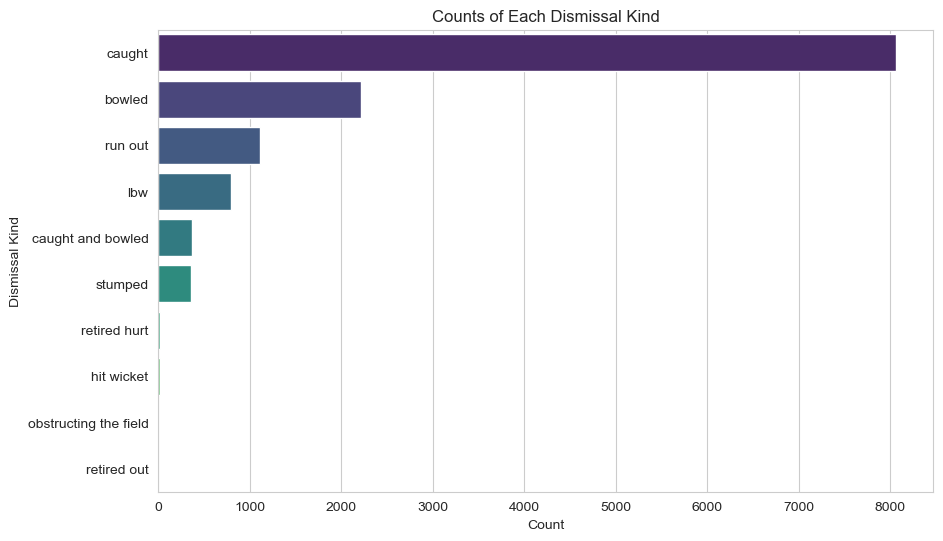

In [204]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x=dismissal_kinds.values,
    y=dismissal_kinds.index,
    palette='viridis'
)
plt.title('Counts of Each Dismissal Kind')
plt.xlabel('Count')
plt.ylabel('Dismissal Kind')
plt.show()

In [205]:
# loading the matches dataset
matches = pd.read_csv('matches.csv')
# checking the first 5 rows of the matches dataset
matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.00,223.00,20.00,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.00,241.00,20.00,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.00,130.00,20.00,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.00,166.00,20.00,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.00,111.00,20.00,N,NaN,BF Bowden,K Hariharan


In [206]:
# check for info about the matches dataset
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [207]:
# check for number of rows and columns in the matches dataset
matches.shape

(1095, 20)

In [208]:
# print unique seasons in a visually appealing way
unique_seasons = matches['season'].unique()
print("IPL Seasons Available:\n" + "\n".join(f"• {season}" for season in unique_seasons))

IPL Seasons Available:
• 2007/08
• 2009
• 2009/10
• 2011
• 2012
• 2013
• 2014
• 2015
• 2016
• 2017
• 2018
• 2019
• 2020/21
• 2021
• 2022
• 2023
• 2024


That means we have data from 2007 to 2024 seasons


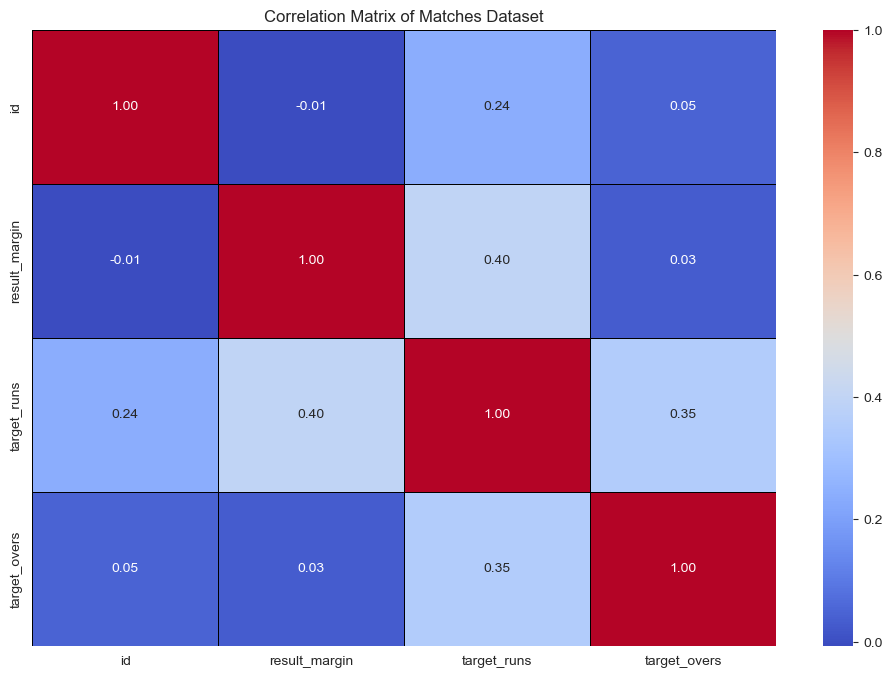

In [209]:
# checking the correlation matrix of the matches dataset
plt.figure(figsize=(12, 8))
sns.heatmap(
    matches.corr(numeric_only=True),
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    linewidths=0.5,
    linecolor='black'   
)
plt.title('Correlation Matrix of Matches Dataset')
plt.show()

result margin and target runs shows some kind of relationship same moderate correlation can be scen between target runs and target overs.

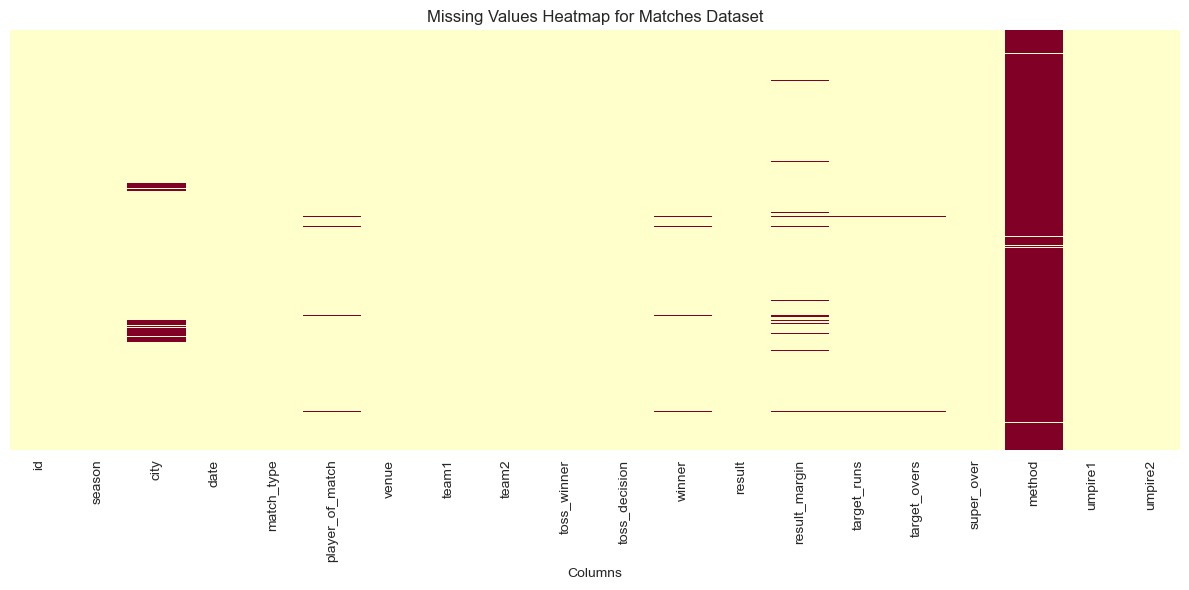

In [210]:
# Calculate missing percentage for matches dataset
missing_percentage_matches = (matches.isnull().sum() / len(matches)) * 100

# Visualize missing values in the matches dataset as a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(
    matches.isnull(),
    cbar=False,
    cmap='YlOrRd',
    yticklabels=False
)
plt.title('Missing Values Heatmap for Matches Dataset')
plt.xlabel('Columns')
plt.tight_layout()
plt.show()


In [211]:
# checking the count of matches
matches['id'].count()

1095

C:\Users\TECH\AppData\Local\Temp\ipykernel_2476\3362538763.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


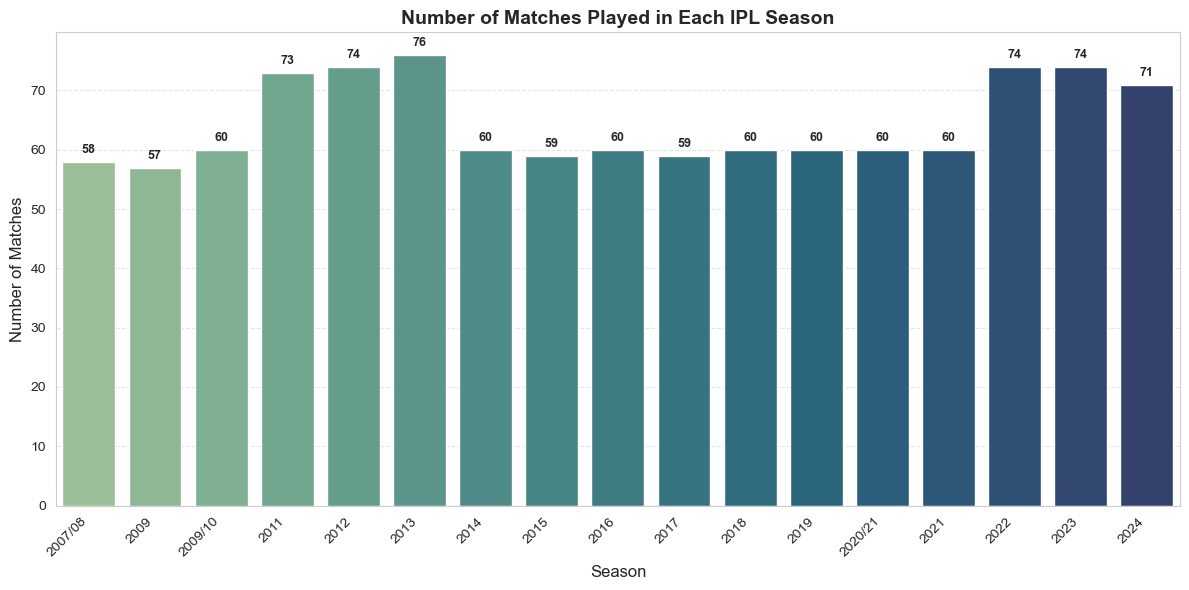

In [212]:
# Number of matches played in each season (optimized and visually appealing)
matches_per_season = matches['season'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(
    x=matches_per_season.index,
    y=matches_per_season.values,
    palette='crest'
)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Number of Matches', fontsize=12)
plt.title('Number of Matches Played in Each IPL Season', fontsize=14, weight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
for i, v in enumerate(matches_per_season.values):
    plt.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=9, fontweight='bold')
plt.show()

C:\Users\TECH\AppData\Local\Temp\ipykernel_2476\3270218792.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


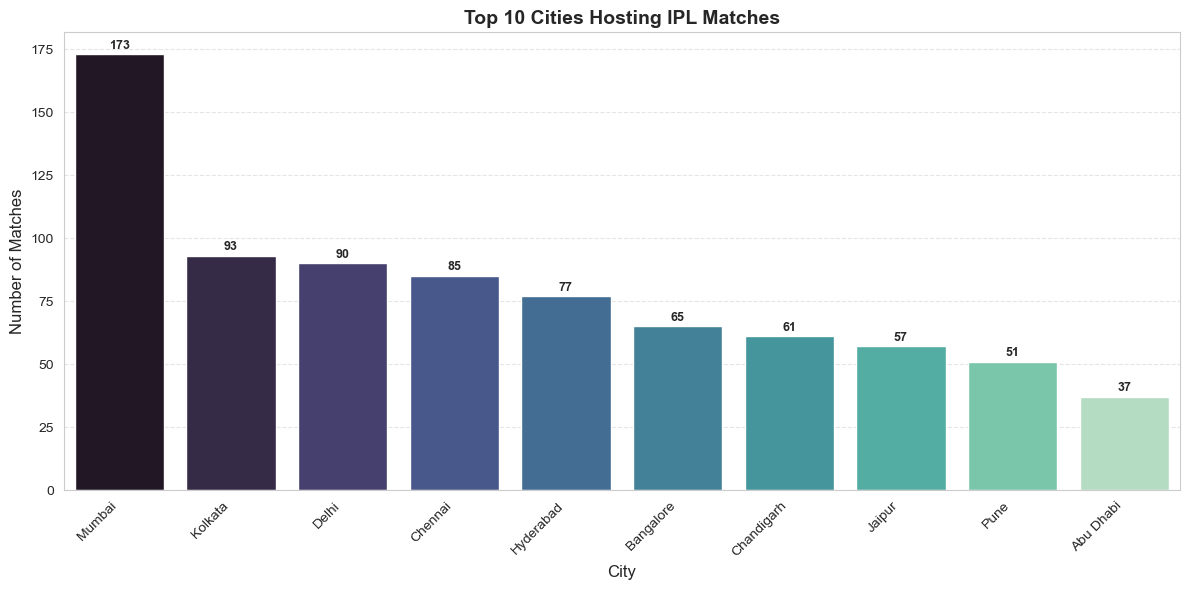

In [213]:
# which city host most matches
matches_per_city = matches['city'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(
    x=matches_per_city.index,
    y=matches_per_city.values,
    palette='mako'
)
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Matches', fontsize=12)
plt.title('Top 10 Cities Hosting IPL Matches', fontsize=14, weight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
for i, v in enumerate(matches_per_city.values):
    plt.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=9, fontweight='bold')
plt.show()


In [214]:
# how many cities hosted IPL matches
num_cities = matches['city'].nunique()
print(f'The number of cities that hosted IPL matches is: {num_cities}')

The number of cities that hosted IPL matches is: 36


In [215]:
# which city hosted the most matches
matches_per_city = matches['city'].value_counts().reset_index()
matches_per_city.columns = ['city', 'number_of_matches']
top_city = matches_per_city.iloc[0]
print(f'The city that hosted the most matches is {top_city["city"]} with {top_city["number_of_matches"]} matches.')


The city that hosted the most matches is Mumbai with 173 matches.


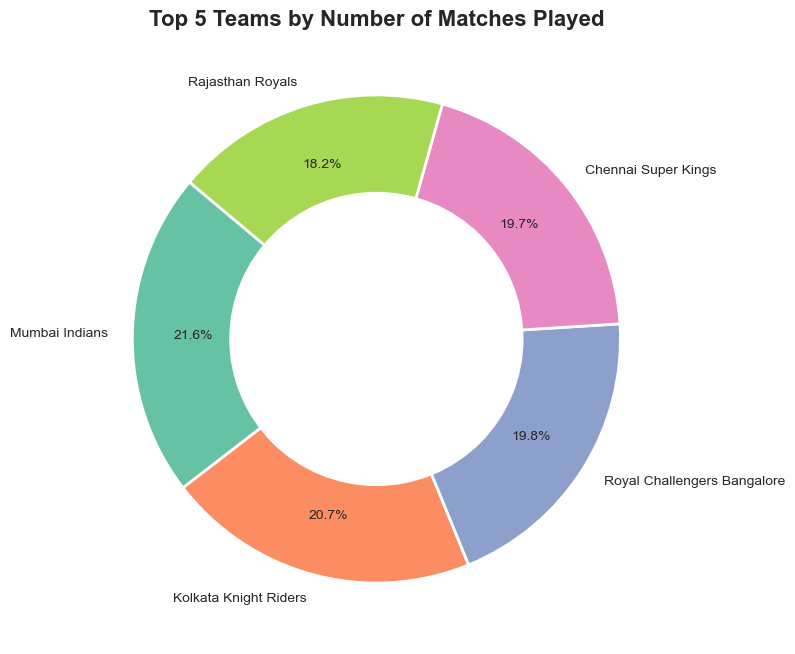

In [216]:
# Calculate matches played by each team if not already defined
matches_per_team = (
    pd.concat([
        matches['team1'],
        matches['team2']
    ])
    .value_counts()
    .reset_index()
)
matches_per_team.columns = ['team', 'number_of_matches']

# Get top 5 teams by number of matches played
top5_teams = matches_per_team.sort_values(by='number_of_matches', ascending=False).head(5)

plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    top5_teams['number_of_matches'],
    labels=top5_teams['team'],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('Set2', n_colors=5),
    wedgeprops={'edgecolor': 'white', 'linewidth': 2},
    pctdistance=0.75  # Move percentage labels closer to the edge
)
# Draw a white circle at the center to make it a donut
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
plt.gca().add_artist(centre_circle)
plt.title('Top 5 Teams by Number of Matches Played', fontsize=16, weight='bold')
plt.tight_layout()
plt.show()


In [217]:
# which team has won least matches
least_wins_team = matches['winner'].value_counts().idxmin()
least_wins_count = matches['winner'].value_counts().min()
print(f'The team with the least wins is {least_wins_team} with {least_wins_count} wins.')

The team with the least wins is Rising Pune Supergiants with 5 wins.


In [218]:
# which team has won most matches
most_wins_team = matches['winner'].value_counts().idxmax()
most_wins_count = matches['winner'].value_counts().max()
print(f'The team with the most wins is {most_wins_team} with {most_wins_count} wins.')

The team with the most wins is Mumbai Indians with 144 wins.


C:\Users\TECH\AppData\Local\Temp\ipykernel_2476\3136307978.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


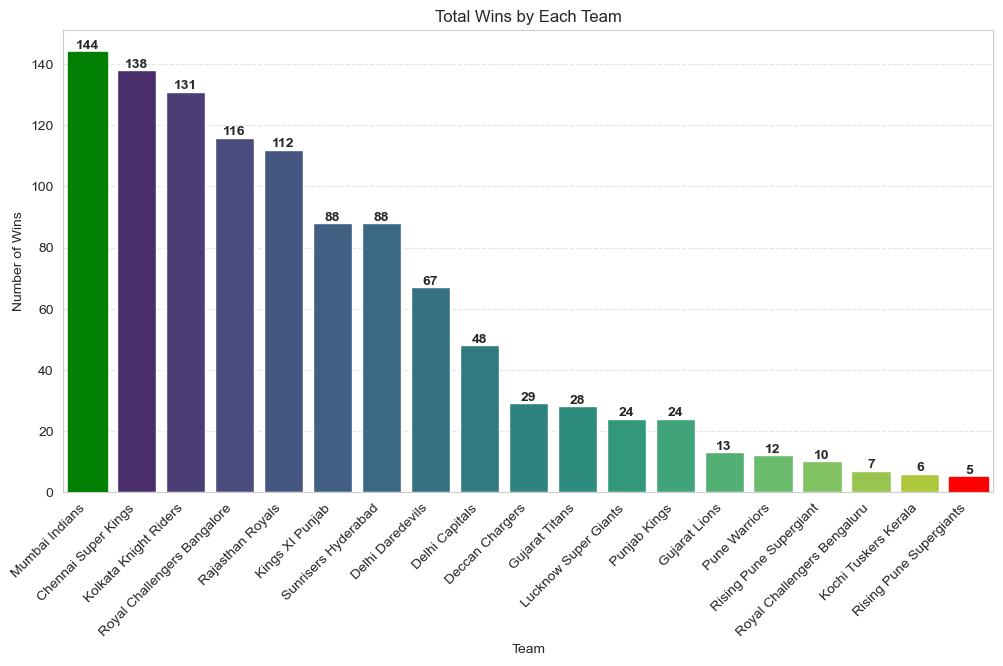

The team with the most wins is Mumbai Indians with 144 wins.
The team with the least wins is Rising Pune Supergiants with 5 wins.


In [219]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count wins per team
win_counts = matches['winner'].value_counts()

# Identify teams with most and least wins
most_wins_team = win_counts.idxmax()
most_wins_count = win_counts.max()

least_wins_team = win_counts.idxmin()
least_wins_count = win_counts.min()

# Plot
plt.figure(figsize=(12, 6))
bars = sns.barplot(
    x=win_counts.index,
    y=win_counts.values,
    palette='viridis'
)

# Annotate counts on top of bars
for bar, count in zip(bars.patches, win_counts.values):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{count}',
        ha='center',
        va='bottom',
        fontweight='bold'
    )

# Highlight most and least wins in different colors
for bar, team in zip(bars.patches, win_counts.index):
    if team == most_wins_team:
        bar.set_color('green')
    if team == least_wins_team:
        bar.set_color('red')

plt.title('Total Wins by Each Team')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# Print most and least wins
print(f'The team with the most wins is {most_wins_team} with {most_wins_count} wins.')
print(f'The team with the least wins is {least_wins_team} with {least_wins_count} wins.')


In [220]:
# check unique vaalues in match_type column
match_types = matches['match_type'].unique()
print("Unique values in 'match_type' column:")
for match_type in match_types:
    print(f"• {match_type}")

Unique values in 'match_type' column:
• League
• Semi Final
• Final
• 3rd Place Play-Off
• Qualifier 1
• Elimination Final
• Qualifier 2
• Eliminator


In [221]:
# matches final played
final_matches = matches[matches['match_type'] == 'Final']
print(f'The number of final matches played is: {len(final_matches)}')

The number of final matches played is: 17


C:\Users\TECH\AppData\Local\Temp\ipykernel_2476\1017884456.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


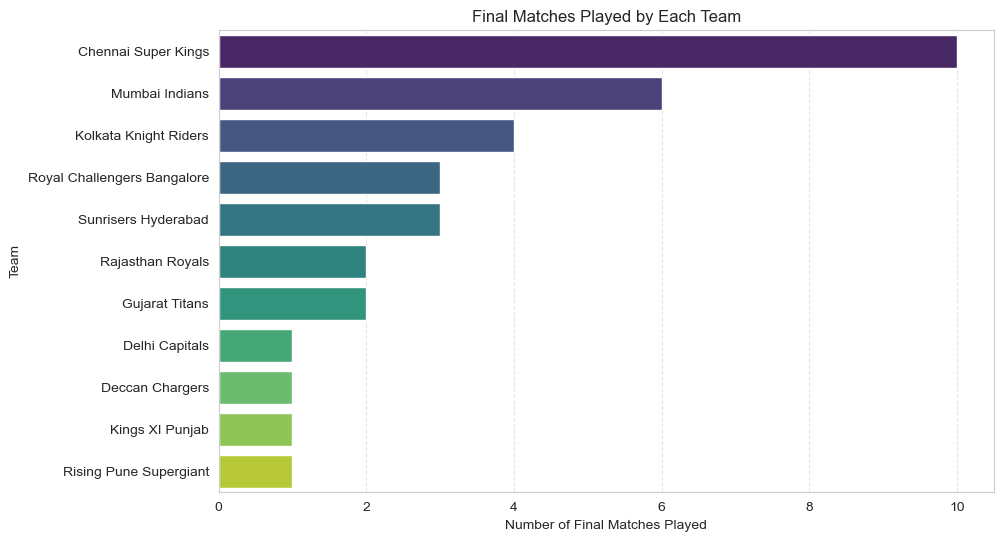

In [222]:
# Filter only 'Final' matches
final_matches = matches[matches['match_type'] == 'Final']

# Combine team1 and team2, count appearances
team_counts = pd.concat([final_matches['team1'], final_matches['team2']]).value_counts()

# Plot bar graph
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(
    x=team_counts.values,
    y=team_counts.index,
    palette='viridis'
)
plt.title('Final Matches Played by Each Team')
plt.xlabel('Number of Final Matches Played')
plt.ylabel('Team')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()


C:\Users\TECH\AppData\Local\Temp\ipykernel_2476\4010461988.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


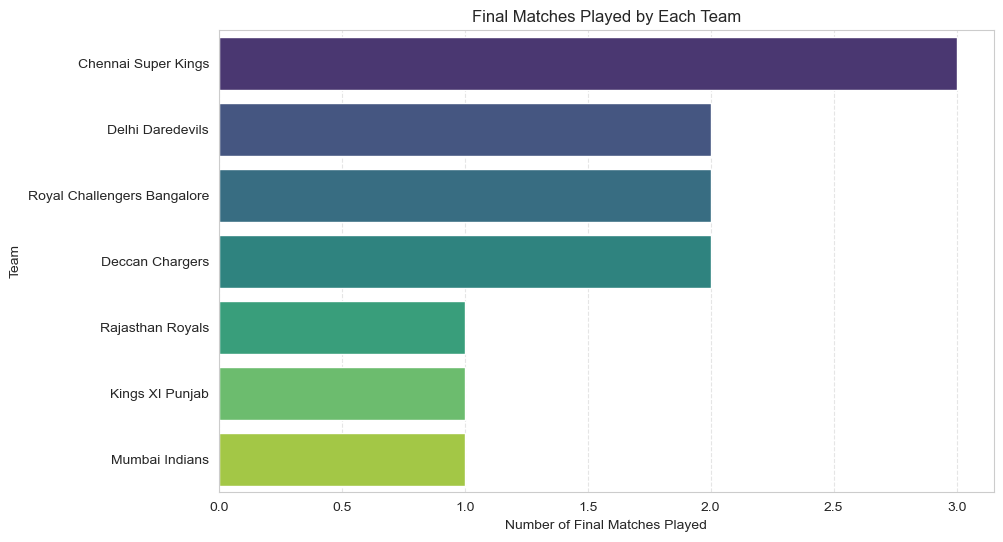

In [223]:
# Filter only 'Final' matches
final_matches = matches[matches['match_type'] == 'Semi Final']

# Combine team1 and team2, count appearances
team_counts = pd.concat([final_matches['team1'], final_matches['team2']]).value_counts()

# Plot bar graph
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(
    x=team_counts.values,
    y=team_counts.index,
    palette='viridis'
)
plt.title('Final Matches Played by Each Team')
plt.xlabel('Number of Final Matches Played')
plt.ylabel('Team')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()


In [224]:
# Filter only 'Final' matches
final_matches = matches[matches['match_type'] == 'Final']

# Count wins in finals
final_wins = final_matches['winner'].value_counts()

# Get the team with the most final wins
most_final_wins_team = final_wins.idxmax()
most_final_wins_count = final_wins.max()

most_final_wins_team, most_final_wins_count

print(f'The team with the most final wins is {most_final_wins_team} with {most_final_wins_count} wins in finals.')


The team with the most final wins is Chennai Super Kings with 5 wins in finals.


In [225]:
# Show which team won in which season
season_winners = matches[matches['match_type'] == 'Final'][['season', 'winner']]
print(season_winners.reset_index(drop=True))


     season                 winner
0   2007/08       Rajasthan Royals
1      2009        Deccan Chargers
2   2009/10    Chennai Super Kings
3      2011    Chennai Super Kings
4      2012  Kolkata Knight Riders
5      2013         Mumbai Indians
6      2014  Kolkata Knight Riders
7      2015         Mumbai Indians
8      2016    Sunrisers Hyderabad
9      2017         Mumbai Indians
10     2018    Chennai Super Kings
11     2019         Mumbai Indians
12  2020/21         Mumbai Indians
13     2021    Chennai Super Kings
14     2022         Gujarat Titans
15     2023    Chennai Super Kings
16     2024  Kolkata Knight Riders


C:\Users\TECH\AppData\Local\Temp\ipykernel_2476\1652834225.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


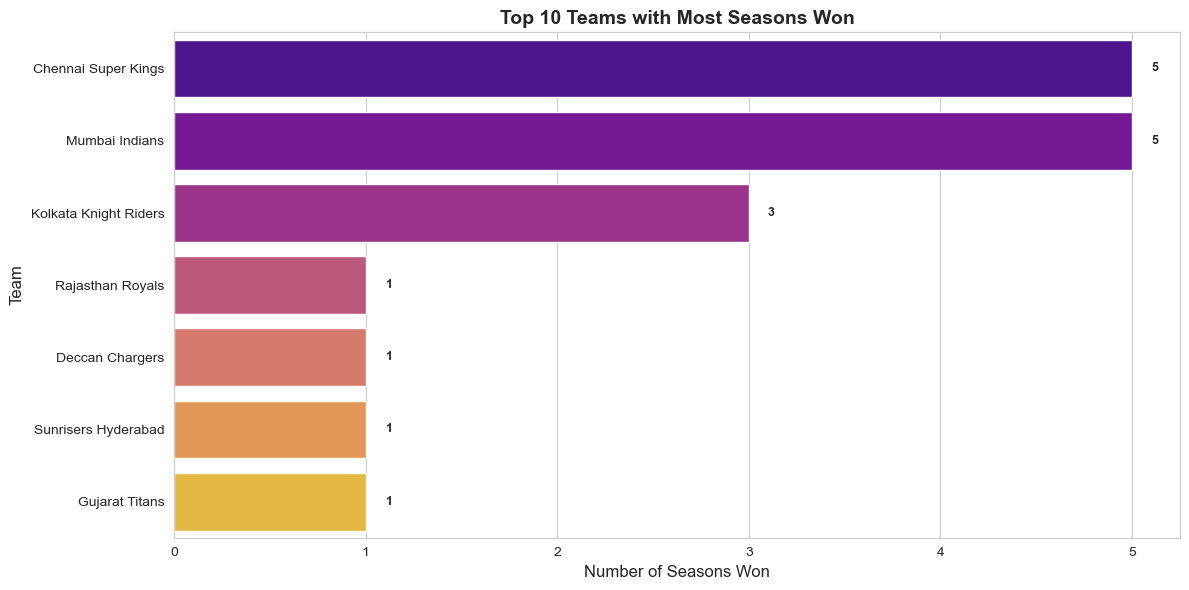

In [226]:
# which team has won most seasons
season_wins = season_winners['winner'].value_counts().reset_index()
season_wins.columns = ['team', 'number_of_seasons_won']
top_season_winner = season_wins.sort_values(by='number_of_seasons_won', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_season_winner['number_of_seasons_won'],
    y=top_season_winner['team'],
    palette='plasma'
)
plt.xlabel('Number of Seasons Won', fontsize=12)
plt.ylabel('Team', fontsize=12)
plt.title('Top 10 Teams with Most Seasons Won', fontsize=14, weight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
for i, v in enumerate(top_season_winner['number_of_seasons_won']):
    plt.text(v + 0.1, i, str(v), va='center', fontsize=9, fontweight='bold')
plt.show()

In [227]:
# checking the summary statistics of target runs
matches['target_runs'].describe()


count   1,092.00
mean      165.68
std        33.43
min        43.00
25%       146.00
50%       166.00
75%       187.00
max       288.00
Name: target_runs, dtype: float64

On an vaerage target runs are 165 where as the maximum are 288.

In [228]:
# team with highest target runs
highest_target_team = matches.loc[matches['target_runs'].idxmax(), ['team1', 'team2']]
highest_target_runs = matches['target_runs'].max()
print(f'The team with the highest target runs is {highest_target_team["team1"]} vs {highest_target_team["team2"]} with {highest_target_runs} runs. \n')
# team with lowest target runs
lowest_target_team = matches.loc[matches['target_runs'].idxmin(), ['team1', 'team2']]
lowest_target_runs = matches['target_runs'].min()
print(f'The team with the lowest target runs is {lowest_target_team["team1"]} vs {lowest_target_team["team2"]} with {lowest_target_runs} runs.')

The team with the highest target runs is Sunrisers Hyderabad vs Royal Challengers Bengaluru with 288.0 runs. 

The team with the lowest target runs is Delhi Daredevils vs Sunrisers Hyderabad with 43.0 runs.


In [229]:
# which team has made the highest win margin (by runs or wickets) in IPL history
highest_score_team = matches.loc[matches['result_margin'].idxmax(), ['team1', 'team2']]
highest_score_runs = matches['result_margin'].max()
print(f'The match with the highest win margin in IPL history is {highest_score_team["team1"]} vs {highest_score_team["team2"]} with a margin of {highest_score_runs}.\n')

# which team has the lowest win margin (excluding 0)
lowest_margin = matches['result_margin'][matches['result_margin'] > 0].min()
lowest_score_team = matches.loc[matches['result_margin'] == lowest_margin, ['team1', 'team2']].iloc[0]
print(f'The match with the lowest win margin in IPL history is {lowest_score_team["team1"]} vs {lowest_score_team["team2"]} with a margin of {lowest_margin}.')

The match with the highest win margin in IPL history is Delhi Daredevils vs Mumbai Indians with a margin of 146.0.

The match with the lowest win margin in IPL history is Mumbai Indians vs Kings XI Punjab with a margin of 1.0.


In [230]:
# stats for super overs
matches['super_over'].describe()


count     1095
unique       2
top          N
freq      1081
Name: super_over, dtype: object

## Data Cleaning

In [231]:
matches.isna().sum()

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

In [232]:
matches.head(1)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.00,223.00,20.00,N,NaN,Asad Rauf,RE Koertzen


In [233]:
matches[matches['winner'].isna()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
241,501265,2011,Delhi,2011-05-21,League,NaN,Feroz Shah Kotla,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,NaN,no result,NaN,NaN,NaN,N,NaN,SS Hazare,RJ Tucker
485,829763,2015,Bangalore,2015-04-29,League,NaN,M Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,no result,NaN,NaN,NaN,N,NaN,JD Cloete,PG Pathak
511,829813,2015,Bangalore,2015-05-17,League,NaN,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,NaN,no result,NaN,188.00,20.00,N,NaN,HDPK Dharmasena,K Srinivasan
744,1178424,2019,Bengaluru,2019-04-30,League,NaN,M.Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,no result,NaN,63.00,5.00,N,NaN,NJ Llong,UV Gandhe
994,1359519,2023,Lucknow,2023-05-03,League,NaN,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Chennai Super Kings,Chennai Super Kings,field,NaN,no result,NaN,NaN,NaN,N,NaN,AK Chaudhary,NA Patwardhan


In [234]:
#Handling null values in winner column
matches.loc[matches.winner.isna(),'winner'] = 'No_Winner'


In [235]:
matches.loc[matches['result'].isna() , 'winner'] = 'No winner'


In [236]:
#Now we will replace team name that are mentioned wrong
matches.replace('Rising Pune Supergiant' , 'Rising Pune Supergiants' , inplace = True)


In [237]:
matches.replace('Rising Pune Supergiants' , 'Pune Warriors' , inplace = True)


In [238]:
matches.team1.value_counts()

team1
Royal Challengers Bangalore    135
Chennai Super Kings            128
Mumbai Indians                 123
Kolkata Knight Riders          121
Rajasthan Royals               101
Kings XI Punjab                 92
Sunrisers Hyderabad             86
Delhi Daredevils                85
Delhi Capitals                  41
Deccan Chargers                 39
Pune Warriors                   37
Punjab Kings                    31
Lucknow Super Giants            23
Gujarat Titans                  21
Gujarat Lions                   16
Royal Challengers Bengaluru      9
Kochi Tuskers Kerala             7
Name: count, dtype: int64

In [239]:
matches.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1095 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [240]:

#Now we will drop method column bcz it have many null values and we can ignore it.
matches.drop('method', axis=1, inplace=True)

In [241]:

#Here we handle null values in result , result_margin & eliminator column
matches.loc[matches['result'].isna() , 'result'] = 'No Result'

In [242]:
matches.loc[matches['result_margin'].isna(), 'result_margin'] = 'No Margin'


C:\Users\TECH\AppData\Local\Temp\ipykernel_2476\3422985037.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'No Margin' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  matches.loc[matches['result_margin'].isna(), 'result_margin'] = 'No Margin'


In [243]:
if 'eliminator' in matches.columns:
	matches.loc[matches['eliminator'].isna(), 'eliminator'] = 'N'
else:
	matches['eliminator'] = 'N'


### Feature Engineering (Winning Percentage)

In [244]:
# Here we will find various features of each team like total matches, won matches, and win percentage
matches_played = pd.concat([matches['team1'], matches['team2']], axis=0)
matches_played = matches_played.value_counts().reset_index()
matches_played.columns = ['Teams', 'Total Matches Played']

# Calculate number of matches won by each team
wins = matches['winner'].value_counts().reset_index()
wins.columns = ['Teams', 'Wins']

# Merge total matches played and wins
matches_played = matches_played.merge(wins, on='Teams', how='left')
matches_played['Wins'] = matches_played['Wins'].fillna(0).astype(int)

# Calculate win percentage
matches_played['Win Percentage'] = matches_played['Wins'] / matches_played['Total Matches Played'] * 100

matches_played


,Teams,Total Matches Played,Wins,Win Percentage
0,Mumbai Indians,261,144,55.17
1,Kolkata Knight Riders,251,131,52.19
2,Royal Challengers Bangalore,240,116,48.33
3,Chennai Super Kings,238,138,57.98
4,Rajasthan Royals,221,112,50.68
5,Kings XI Punjab,190,88,46.32
6,Sunrisers Hyderabad,182,88,48.35
7,Delhi Daredevils,161,67,41.61
8,Delhi Capitals,91,48,52.75
9,Pune Warriors,76,27,35.53


C:\Users\TECH\AppData\Local\Temp\ipykernel_2476\2334249569.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\TECH\AppData\Local\Temp\ipykernel_2476\2334249569.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(matches_played['Teams'], rotation=75, ha='right', fontsize=10)
C:\Users\TECH\AppData\Local\Temp\ipykernel_2476\2334249569.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\TECH\AppData\Local\Temp\ipykernel_2476\2334249569.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocat

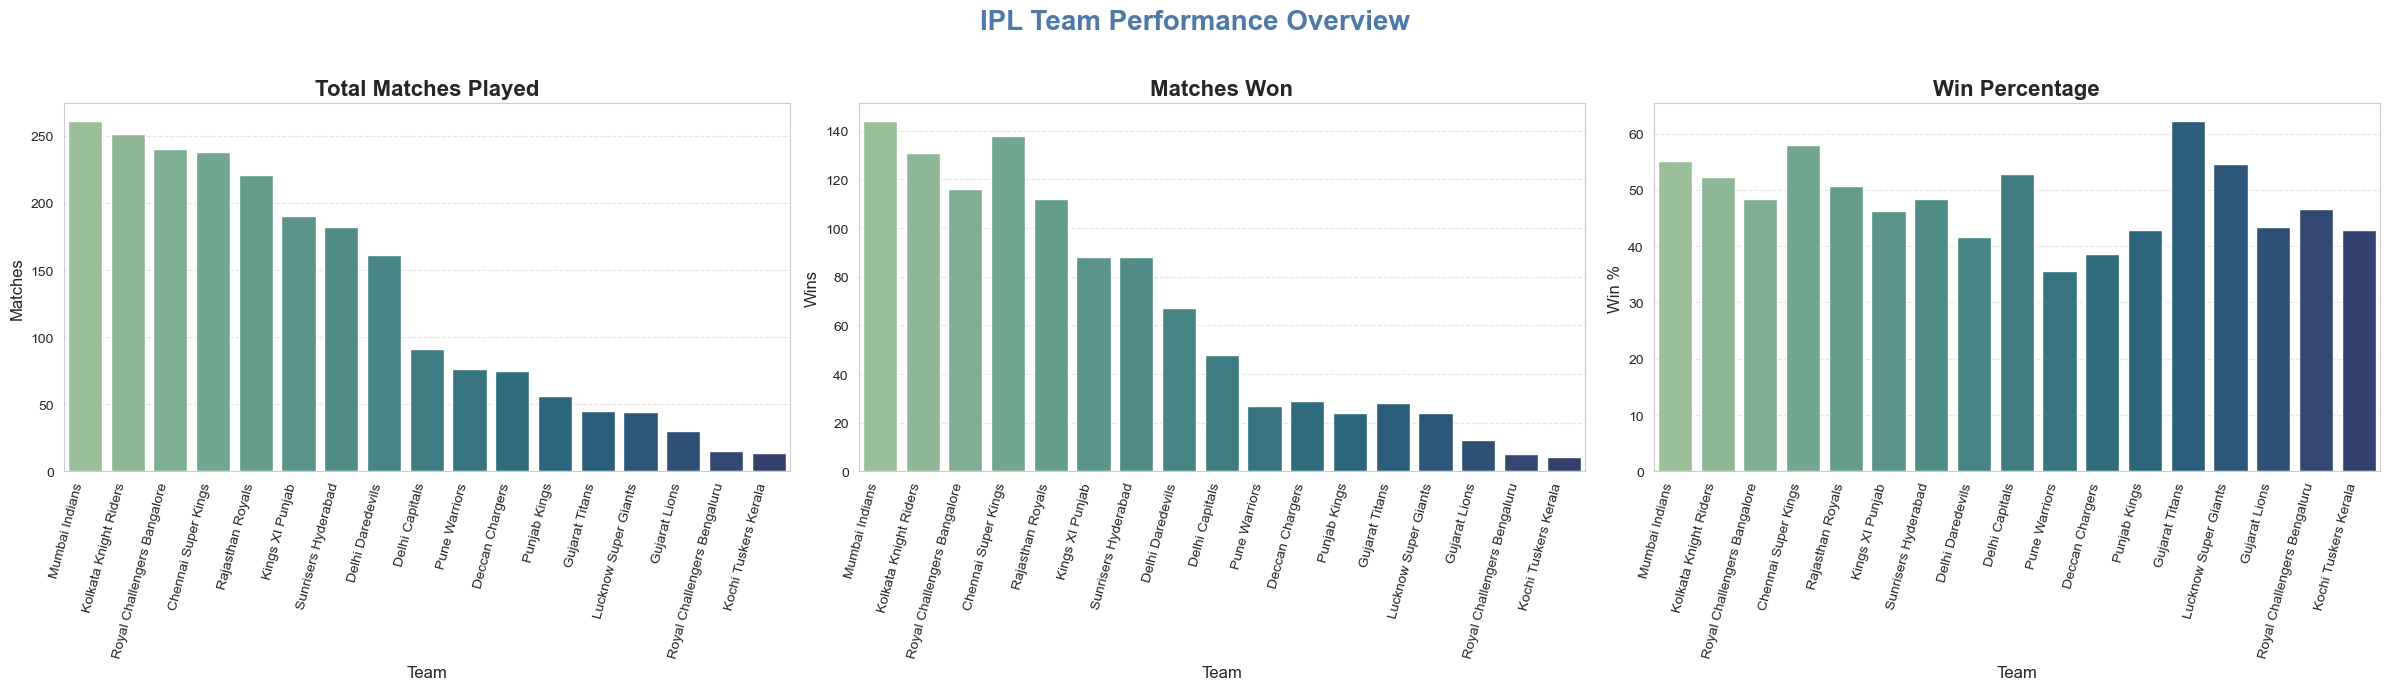

In [245]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 7))
bar_colors = sns.color_palette('crest', n_colors=len(matches_played))

# Total Matches Played
sns.barplot(
    x='Teams', y='Total Matches Played', data=matches_played,
    ax=axes[0], palette=bar_colors
)
axes[0].set_title('Total Matches Played', fontsize=16, weight='bold')
axes[0].set_xlabel('Team', fontsize=12)
axes[0].set_ylabel('Matches', fontsize=12)
axes[0].set_xticklabels(matches_played['Teams'], rotation=75, ha='right', fontsize=10)
axes[0].grid(axis='y', linestyle='--', alpha=0.5)

# Matches Won
sns.barplot(
    x='Teams', y='Wins', data=matches_played,
    ax=axes[1], palette=bar_colors
)
axes[1].set_title('Matches Won', fontsize=16, weight='bold')
axes[1].set_xlabel('Team', fontsize=12)
axes[1].set_ylabel('Wins', fontsize=12)
axes[1].set_xticklabels(matches_played['Teams'], rotation=75, ha='right', fontsize=10)
axes[1].grid(axis='y', linestyle='--', alpha=0.5)

# Win Percentage
sns.barplot(
    x='Teams', y='Win Percentage', data=matches_played,
    ax=axes[2], palette=bar_colors
)
axes[2].set_title('Win Percentage', fontsize=16, weight='bold')
axes[2].set_xlabel('Team', fontsize=12)
axes[2].set_ylabel('Win %', fontsize=12)
axes[2].set_xticklabels(matches_played['Teams'], rotation=75, ha='right', fontsize=10)
axes[2].grid(axis='y', linestyle='--', alpha=0.5)

plt.suptitle('IPL Team Performance Overview', fontsize=20, weight='bold', color='#4E79A7')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


C:\Users\TECH\AppData\Local\Temp\ipykernel_2476\3059162522.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: pd.Series({
C:\Users\TECH\AppData\Local\Temp\ipykernel_2476\3059162522.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


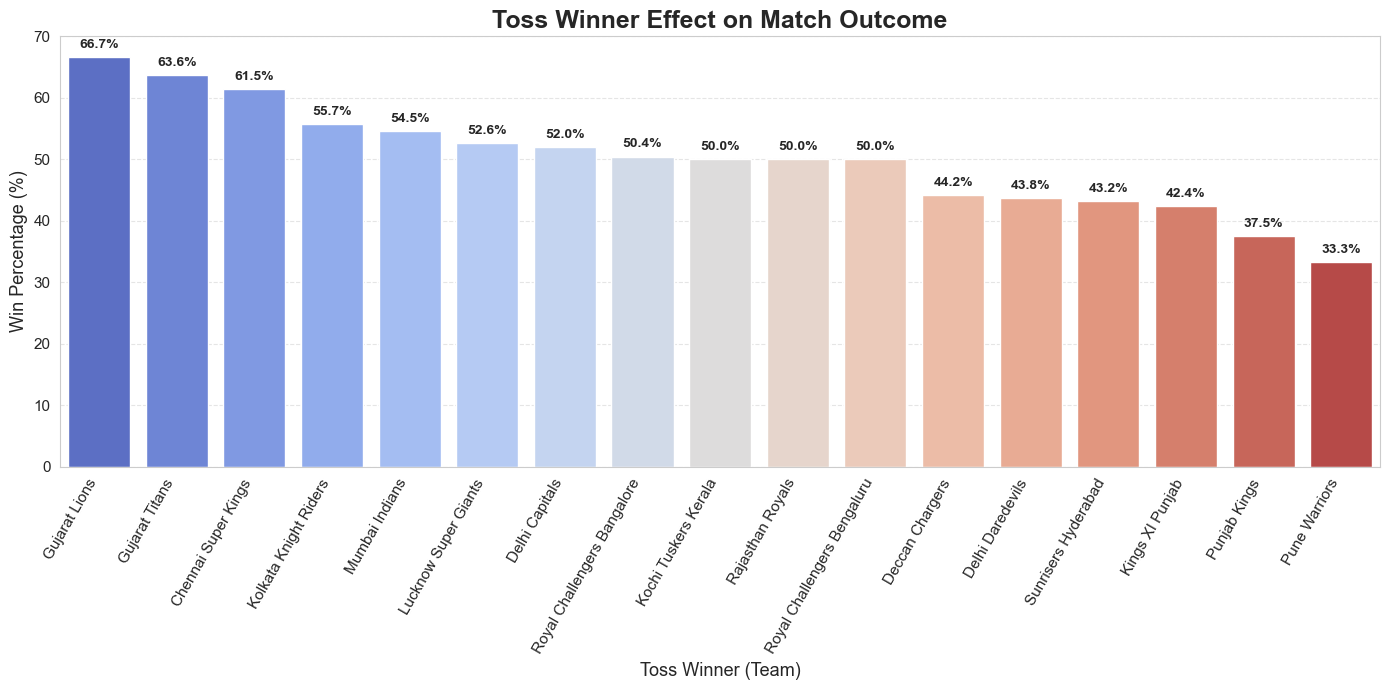

In [246]:
# Calculate toss winner stats if not already defined
toss_winner_stats = (
    matches.groupby('toss_winner')
    .apply(lambda x: pd.Series({
        'TossWinAndMatchWin': (x['toss_winner'] == x['winner']).sum(),
        'Total Matches': len(x)
    }))
    .reset_index()
)
toss_winner_stats['Win Percentage'] = toss_winner_stats['TossWinAndMatchWin'] / toss_winner_stats['Total Matches'] * 100

# Sort by Win Percentage for better readability
toss_winner_stats_sorted = toss_winner_stats.sort_values(by='Win Percentage', ascending=False)

plt.figure(figsize=(14, 7))
barplot = sns.barplot(
    x='toss_winner',
    y='Win Percentage',
    data=toss_winner_stats_sorted,
    palette='coolwarm'
)
plt.title('Toss Winner Effect on Match Outcome', fontsize=18, weight='bold')
plt.xlabel('Toss Winner (Team)', fontsize=13)
plt.ylabel('Win Percentage (%)', fontsize=13)
plt.xticks(rotation=60, ha='right', fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Annotate bars with win percentage values
for i, v in enumerate(toss_winner_stats_sorted['Win Percentage']):
    barplot.text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

### Merginig Deliveries and Matches

In [247]:
# combine both deliveries and matches datasets
df = pd.merge(deliveries, matches, left_on='match_id', right_on='id', suffixes=('_delivery', '_match'))

# to show all columns in the combined dataset
pd.set_option('display.max_columns', None)

# Check the first few rows of the combined dataset
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,umpire1,umpire2,eliminator
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.00,223.00,20.00,N,Asad Rauf,RE Koertzen,N
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.00,223.00,20.00,N,Asad Rauf,RE Koertzen,N
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.00,223.00,20.00,N,Asad Rauf,RE Koertzen,N
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.00,223.00,20.00,N,Asad Rauf,RE Koertzen,N
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.00,223.00,20.00,N,Asad Rauf,RE Koertzen,N


In [248]:
# checking unique values in `inning` column
innings_unique = df['inning'].unique()
print("Unique values in 'inning' column:")
print(innings_unique)

Unique values in 'inning' column:
[1 2 3 4 5 6]


C:\Users\TECH\AppData\Local\Temp\ipykernel_2476\750621184.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


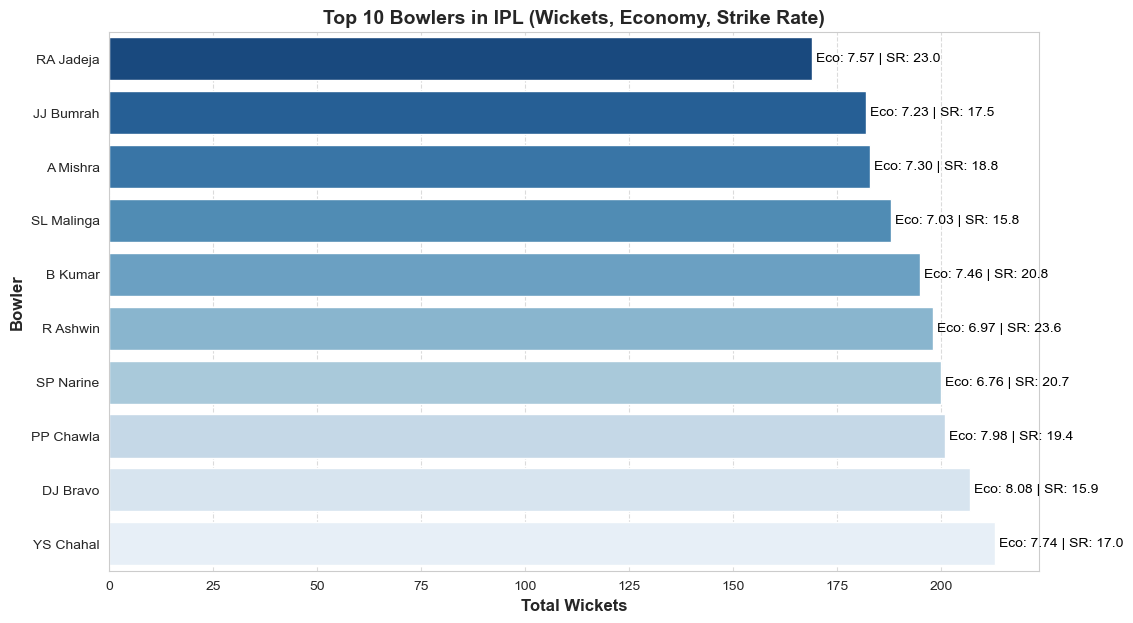

In [249]:
# Calculate total wickets for each bowler
bowler_wickets = deliveries[deliveries['is_wicket'] == 1].groupby('bowler')['is_wicket'].count().reset_index()
bowler_wickets.columns = ['bowler', 'total_wickets']

# Calculate total balls bowled by each bowler
bowler_balls = deliveries.groupby('bowler').size().reset_index(name='balls_bowled')

# Calculate total runs conceded by each bowler
bowler_runs = deliveries.groupby('bowler')['total_runs'].sum().reset_index()

# Merge all stats
bowler_stats = bowler_wickets.merge(bowler_balls, on='bowler').merge(bowler_runs, on='bowler')

# Calculate economy rate and strike rate
bowler_stats['economy_rate'] = bowler_stats['total_runs'] / (bowler_stats['balls_bowled'] / 6)
bowler_stats['strike_rate'] = bowler_stats['balls_bowled'] / bowler_stats['total_wickets']

# Get top 10 bowlers by wickets
top_10_bowlers = bowler_stats.sort_values(by='total_wickets', ascending=False).head(10)

# Sort bowlers by total wickets for plotting
top_10_bowlers_sorted = top_10_bowlers.sort_values(by="total_wickets", ascending=True)

# Set the style
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

# Create a bar plot
ax = sns.barplot(
    y=top_10_bowlers_sorted["bowler"],
    x=top_10_bowlers_sorted["total_wickets"],
    palette="Blues_r"
)

# Add data labels (Economy & Strike Rate)
for index, value in enumerate(top_10_bowlers_sorted["total_wickets"]):
    eco_rate = top_10_bowlers_sorted.iloc[index]["economy_rate"]
    strike_rate = top_10_bowlers_sorted.iloc[index]["strike_rate"]
    
    plt.text(value + 1, index, f"Eco: {eco_rate:.2f} | SR: {strike_rate:.1f}", fontsize=10, color="black", va="center")

# Titles and labels
plt.xlabel("Total Wickets", fontsize=12, fontweight="bold")
plt.ylabel("Bowler", fontsize=12, fontweight="bold")
plt.title("Top 10 Bowlers in IPL (Wickets, Economy, Strike Rate)", fontsize=14, fontweight="bold")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Show plot
plt.show()

-----

# Models

In [250]:
deliveries = deliveries.copy()
matches = matches.copy()

### calculating the total runs for first inning

In [251]:
inning_scores = deliveries.groupby(['match_id', 'inning']).sum()['total_runs'].reset_index()
inning_scores = inning_scores[inning_scores['inning']==1]
inning_scores.head()

,match_id,inning,total_runs
0,335982,1,222
2,335983,1,240
4,335984,1,129
6,335985,1,165
8,335986,1,110


### Feature Engineering (Introducing Traget Runs for first inning)

In [252]:
inning_scores['target'] = inning_scores['total_runs'] + 1
inning_scores.head()


,match_id,inning,total_runs,target
0,335982,1,222,223
2,335983,1,240,241
4,335984,1,129,130
6,335985,1,165,166
8,335986,1,110,111


### column renaming

In [253]:
# rename the 'id' column to 'match_id' for consistency
matches.rename(columns={'id': 'match_id'}, inplace=True)
matches.head(2)

,match_id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,umpire1,umpire2,eliminator
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.00,223.00,20.00,N,Asad Rauf,RE Koertzen,N
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.00,241.00,20.00,N,MR Benson,SL Shastri,N


### merging the inning_scores DataFrame with the matches DataFrame on the 'match_id' column

In [254]:
# merge the inning_scores DataFrame with the matches DataFrame on the 'match_id' column
matches = matches.merge(inning_scores[['match_id','target']], on='match_id')
matches.head(2)

,match_id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,umpire1,umpire2,eliminator,target
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.00,223.00,20.00,N,Asad Rauf,RE Koertzen,N,223
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.00,241.00,20.00,N,MR Benson,SL Shastri,N,241


In [255]:
# Check unique values in 'team1' column
matches['team1'].unique()


array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

### Team Name Standardization and Replacement


In [256]:
# Mapping dictionary for old names to standardized names
team_name_mapping = {
    'Delhi Daredevils': 'Delhi Capitals',
    'Kings XI Punjab': 'Punjab Kings',
    'Rising Pune Supergiants': 'Pune Warriors',
    'Rising Pune Supergiant': 'Pune Warriors',
    'Gujarat Lions': 'Gujarat Titans',
    'Deccan Chargers': 'Sunrisers Hyderabad',
    'Royal Challengers Bengaluru': 'Royal Challengers Bangalore',
}

team_columns = ['winner', 'team1', 'team2', 'toss_winner']

# Replace the team names in team columns
matches[team_columns] = matches[team_columns].replace(team_name_mapping)



In [257]:
# cities that hosted IPL matches
matches['city'].unique()


array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', nan, 'Rajkot', 'Kanpur', 'Bengaluru', 'Dubai',
       'Sharjah', 'Navi Mumbai', 'Lucknow', 'Guwahati', 'Mohali'],
      dtype=object)

### Dealing anamoly in city name

In [258]:
# Replace city names
map_city_names = {'Bengaluru': 'Bangalore'}
matches['city'] = matches['city'].replace(map_city_names)

matches['city'].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', nan, 'Rajkot', 'Kanpur', 'Dubai', 'Sharjah',
       'Navi Mumbai', 'Lucknow', 'Guwahati', 'Mohali'], dtype=object)

### now checking the unique values in matches dataset after merging and manipulation

In [259]:
# Check for null values in the 'city' column
matches.isnull().sum().any()


True

In [260]:
# print the column names with null values
null_columns = matches.columns[matches.isnull().any()].tolist()
print("Columns with null values:", null_columns)

Columns with null values: ['city', 'player_of_match', 'target_runs', 'target_overs']


In [261]:
# print the number of missing values in each column
missing_values = matches.isnull().sum()
print("Number of missing values in each column:\n", missing_values[missing_values > 0])

Number of missing values in each column:
 city               51
player_of_match     5
target_runs         3
target_overs        3
dtype: int64


### selecting some columns and any null values

In [262]:
# Extracting only selected columns
matches = matches[['match_id', 'season', 'city', 'team1', 'team2', 'winner', 'target']].dropna()
matches.head()

,match_id,season,city,team1,team2,winner,target
0,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223
1,335983,2007/08,Chandigarh,Punjab Kings,Chennai Super Kings,Chennai Super Kings,241
2,335984,2007/08,Delhi,Delhi Capitals,Rajasthan Royals,Delhi Capitals,130
3,335985,2007/08,Mumbai,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,166
4,335986,2007/08,Kolkata,Kolkata Knight Riders,Sunrisers Hyderabad,Kolkata Knight Riders,111


### Replacing the team names in the 'batting_team' and 'bowling_team' columns

In [263]:
# Replace the team names in the 'batting_team' column
deliveries['batting_team'] = deliveries['batting_team'].replace(team_name_mapping)
deliveries['bowling_team'] = deliveries['bowling_team'].replace(team_name_mapping)


deliveries.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


### Now merging the deliveries dataset with the matches dataset on the 'match_id' column

In [264]:
# Merge to the final dataset on match_id
final = matches.merge(deliveries, on='match_id')
final.head(2)

,match_id,season,city,team1,team2,winner,target,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


### fetching the second inning matches

In [265]:
# Get only second inning matches
final = final[final['inning'] == 2]
final.head(2)

,match_id,season,city,team1,team2,winner,target,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
124,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,AB Dinda,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN
125,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,AB Dinda,R Dravid,0,1,1,wides,0,NaN,NaN,NaN


### Feature Engineering

### Adding a new column curret score to the final dataset by cummulative sum of total runs

In [266]:
# Add 'current_score'
final['current_score'] = final.groupby('match_id')['total_runs'].cumsum()
final.head(2)

,match_id,season,city,team1,team2,winner,target,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score
124,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,AB Dinda,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN,1
125,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,AB Dinda,R Dravid,0,1,1,wides,0,NaN,NaN,NaN,2


### Adding a new column runs_left

In [267]:
# Calculate runs remaining for each match 
runs_remaining = final['target'] - final['current_score']
# Ensure runs_remaining is non-negative
runs_remaining = runs_remaining.clip(lower=0)  

# Assign to new column
final['runs_left'] = runs_remaining

# Show first 2 rows
final.head(2)

,match_id,season,city,team1,team2,winner,target,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left
124,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,AB Dinda,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN,1,222
125,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,AB Dinda,R Dravid,0,1,1,wides,0,NaN,NaN,NaN,2,221


### Adding a new column balls_left

In [268]:

# Calculate total balls bowled so far in the match
balls_bowled = final['over'] * 6 + final['ball'] 

# calculate balls remaining  
balls_remaining = 120 - balls_bowled 
# Ensure balls_remaining is non-negative                 
balls_remaining = balls_remaining.clip(lower=0)       

# Assign to new column
final['balls_left'] = balls_remaining

# Show result
final.head(2)


,match_id,season,city,team1,team2,winner,target,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
124,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,AB Dinda,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN,1,222,119
125,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,AB Dinda,R Dravid,0,1,1,wides,0,NaN,NaN,NaN,2,221,118


### Adding a new column wickets_left

In [269]:
### adding counter for wickets fallen and remaining
# Calculate cumulative sum of wickets fallen in each match
wickets_fallen = final.groupby('match_id')['is_wicket'].cumsum()  
wickets_remaining = 10 - wickets_fallen                          
# Ensure wickets_fallen is non-negative
wickets_fallen = wickets_fallen.clip(lower=0)

# Assign to the DataFrame
final['wickets_left'] = wickets_remaining

# Show result
final.head(2)

,match_id,season,city,team1,team2,winner,target,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left
124,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,AB Dinda,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN,1,222,119,10
125,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,AB Dinda,R Dravid,0,1,1,wides,0,NaN,NaN,NaN,2,221,118,10


### Calculating the current run rate

In [270]:
# Calculate 'current_run_rate'
final['current_run_rate'] = np.where(
    120 - final['balls_left'] > 0,
    (final['current_score'] * 6) / (120 - final['balls_left']),
    0
)

# Calculate 'required_run_rate'
final['required_run_rate'] = np.where(
    final['balls_left'] > 0, 
    (final['runs_left'] * 6) / final['balls_left'], 
    np.where(final['runs_left'] > 0, 1e6, 0)
)

final.head(2)

,match_id,season,city,team1,team2,winner,target,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate
124,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,AB Dinda,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN,1,222,119,10,6.00,11.19
125,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,AB Dinda,R Dravid,0,1,1,wides,0,NaN,NaN,NaN,2,221,118,10,6.00,11.24


In [271]:
# Define the result function to determine match outcome
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

final['result'] = final.apply(result, axis=1)
final.head(2)

,match_id,season,city,team1,team2,winner,target,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate,result
124,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,AB Dinda,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN,1,222,119,10,6.00,11.19,0
125,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,AB Dinda,R Dravid,0,1,1,wides,0,NaN,NaN,NaN,2,221,118,10,6.00,11.24,0


### Feature Selection (Some Important features)

In [272]:
# Select relevant columns for the final DataFrame
winning_pred = final[['season', 'batting_team', 'bowling_team' ,'runs_left', 'balls_left', 'wickets_left', 'current_run_rate', 'required_run_rate', 'target', 'result']]
winning_pred.head(20)

,season,batting_team,bowling_team,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate,target,result
124,2007/08,Royal Challengers Bangalore,Kolkata Knight Riders,222,119,10,6.00,11.19,223,0
125,2007/08,Royal Challengers Bangalore,Kolkata Knight Riders,221,118,10,6.00,11.24,223,0
126,2007/08,Royal Challengers Bangalore,Kolkata Knight Riders,221,117,10,4.00,11.33,223,0
127,2007/08,Royal Challengers Bangalore,Kolkata Knight Riders,220,116,10,4.50,11.38,223,0
128,2007/08,Royal Challengers Bangalore,Kolkata Knight Riders,219,115,10,4.80,11.43,223,0
129,2007/08,Royal Challengers Bangalore,Kolkata Knight Riders,219,114,10,4.00,11.53,223,0
130,2007/08,Royal Challengers Bangalore,Kolkata Knight Riders,219,113,10,3.43,11.63,223,0
131,2007/08,Royal Challengers Bangalore,Kolkata Knight Riders,219,113,9,3.43,11.63,223,0
132,2007/08,Royal Challengers Bangalore,Kolkata Knight Riders,219,112,9,3.00,11.73,223,0
133,2007/08,Royal Challengers Bangalore,Kolkata Knight Riders,215,111,9,5.33,11.62,223,0


In [273]:
winning_pred.corr(numeric_only=True)

,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate,target,result
runs_left,1.00,0.83,0.49,-0.19,-0.09,0.40,-0.25
balls_left,0.83,1.00,0.76,-0.15,-0.12,-0.07,0.06
wickets_left,0.49,0.76,1.00,0.04,-0.14,-0.17,0.33
current_run_rate,-0.19,-0.15,0.04,1.00,0.01,0.28,0.14
required_run_rate,-0.09,-0.12,-0.14,0.01,1.00,0.03,-0.06
target,0.40,-0.07,-0.17,0.28,0.03,1.00,-0.40
result,-0.25,0.06,0.33,0.14,-0.06,-0.40,1.00


In [274]:
# Check unique values in 'batting_team' column
winning_pred['batting_team'].unique()

array(['Royal Challengers Bangalore', 'Punjab Kings', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Rajasthan Royals', 'Mumbai Indians',
       'Chennai Super Kings', 'Sunrisers Hyderabad', 'Pune Warriors',
       'Kochi Tuskers Kerala', 'Gujarat Titans', 'Lucknow Super Giants'],
      dtype=object)

### Encoding the categorical features

In [275]:
# add one-hot encoding for 'batting_team' and 'bowling_team'
winning_pred = pd.get_dummies(winning_pred, columns=['batting_team', 'bowling_team'], drop_first=True)


In [276]:
# appling train-test split
from sklearn.model_selection import train_test_split

X1 = winning_pred.drop(columns=['result', 'season'])
y1 = winning_pred['result']

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [277]:
# print the shape of the train and test sets
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")

Training set shape: (95783, 28), (95783,)
Test set shape: (23946, 28), (23946,)


In [278]:
# Save column names after encoding for future decoding and alignment
encoded_columns = X_train.columns.tolist()

# Create a decoder for prediction labels
result_decoder = {0: 'Loss', 1: 'Win'}

# Store list of categorical options to reapply one-hot encoding later
batting_teams = [col.replace('batting_team_', '') for col in encoded_columns if col.startswith('batting_team_')]
bowling_teams = [col.replace('bowling_team_', '') for col in encoded_columns if col.startswith('bowling_team_')]

# Sample: display the encoded feature names and the decoder
encoded_columns[:5], result_decoder


(['runs_left',
  'balls_left',
  'wickets_left',
  'current_run_rate',
  'required_run_rate'],
 {0: 'Loss', 1: 'Win'})

In [279]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)
# Predict on the test set
y_pred = model.predict(X_test)
# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Model Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     11388
           1       0.99      0.99      0.99     12558

    accuracy                           0.99     23946
   macro avg       0.99      0.99      0.99     23946
weighted avg       0.99      0.99      0.99     23946

Confusion Matrix:
[[11318    70]
 [   65 12493]]


In [280]:
# caculate training accuracy
train_accuracy = model.score(X_train, y_train)
print(f"Training Accuracy: {train_accuracy:.2f}")

Training Accuracy: 1.00


In [281]:
# calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")


Test Accuracy: 0.99


In [ ]:
# sample input for prediction
sample_input = {
    'batting_team': 'Chennai Super Kings',
    'bowling_team': 'Mumbai Indians',
    
    'runs_left': 180,
    'balls_left': 120,
    'wickets_left': 10,
    'current_run_rate': 0.0 ,
    'required_run_rate': 9.0,
    'target': 180
}

In [283]:


# Prepare the sample input as a DataFrame with the same columns as X_train
import pandas as pd

# Create DataFrame from sample_input
sample_df = pd.DataFrame([sample_input])

# Add missing columns (from encoded_columns) and set to False/0
for col in encoded_columns:
    if col not in sample_df.columns:
        # If it's a bool column (team encoding), set to False, else 0
        if sample_df.dtypes.get(col, None) == 'bool' or col.startswith('batting_team_') or col.startswith('bowling_team_'):
            sample_df[col] = False
        else:
            sample_df[col] = 0

# Reorder columns to match training data
sample_df = sample_df[encoded_columns]

# Predict and decode
predicted_label = model.predict(sample_df)[0]
predicted_prob = model.predict_proba(sample_df)[0][1]

# Find the winning team based on prediction
if predicted_label == 1:
    winning_team = sample_input['batting_team']
else:
    winning_team = sample_input['bowling_team']

print(f"Predicted Result: {result_decoder[predicted_label]}")
print(f"Winning Team: {winning_team}")
print(f"Win Probability: {predicted_prob:.2f}")

result_decoder[predicted_label], predicted_prob


Predicted Result: Loss
Winning Team: Mumbai Indians
Win Probability: 0.28


('Loss', 0.28)

In [284]:
%pip install xgboost

from xgboost import XGBClassifier

model = XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)
# Predict on the test set
y_pred = model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Note: you may need to restart the kernel to use updated packages.
Model Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     11388
           1       0.98      0.99      0.99     12558

    accuracy                           0.98     23946
   macro avg       0.98      0.98      0.98     23946
weighted avg       0.98      0.98      0.98     23946

Confusion Matrix:
[[11191   197]
 [  166 12392]]


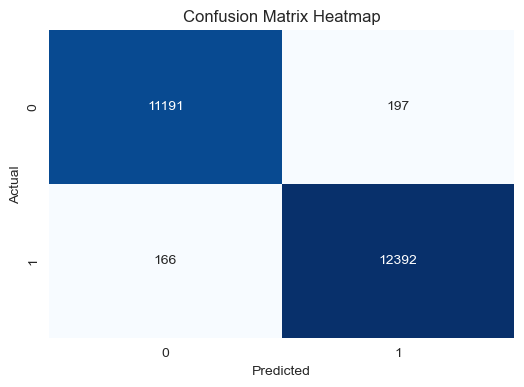

In [285]:
from sklearn.metrics import confusion_matrix

# Example: assuming y_test and y_pred are defined
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()